# Linear Kernel CCA Proof

In this notebook we show that the implementation of the Linear Kernel CCA establishes a linear relationship between two views of data that are linearly related based on shared latent variables.

In [1]:
%matplotlib inline
import numpy as np
import sys
sys.path.append("../../..")
from multiview.embed.kcca import KCCA
from multiview.embed.gcca import GCCA

import matplotlib.pyplot as plt

# Initialize number of samples
nSamples = 1000

# Define two latent variables (number of samples x 1)
latvar1 = np.random.randn(nSamples,)
latvar2 = np.random.randn(nSamples,)

# Define independent components for each dataset (number of observations x dataset dimensions)
indep1 = np.random.randn(nSamples, 4)
indep2 = np.random.randn(nSamples, 5)

# Create two datasets, with each dimension composed as a sum of 75% one of the latent variables and 25% independent component
data1 = 0.25*indep1 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2)).T
data2 = 0.25*indep2 + 0.75*np.vstack((latvar1, latvar2, latvar1, latvar2, latvar1)).T

# Split each dataset into a training set and test set (10% of dataset is training data)
train1 = data1[:int(nSamples/10)]
train2 = data2[:int(nSamples/10)]
test1 = data1[int(nSamples/10):]
test2 = data2[int(nSamples/10):]

In [2]:
# View 1 of the data is a 1000 x 4 matrix
data1

array([[-0.07486789, -1.30797579, -0.72241957, -1.2342757 ],
       [ 1.94683141,  0.68461049,  1.99954495,  0.85471897],
       [ 0.31747824, -0.30077351,  0.71516192, -0.54054461],
       ...,
       [ 0.14500468,  0.60914984, -0.04670136,  0.60013699],
       [ 0.60059067, -0.14813367,  0.68771411, -0.25209178],
       [ 0.19599579, -0.99532693,  0.27027827, -0.93686808]])

In [3]:
# View 2 of the data is a 1000 x 5 matrix
data2

array([[-0.81289464, -1.38995215, -0.18545921, -1.52361847, -0.70774473],
       [ 1.63703763,  1.12146742,  1.77108235,  1.08122723,  2.16792275],
       [ 0.07241885, -0.32615813,  0.09444887, -0.53338071,  0.78541827],
       ...,
       [ 0.15264475,  1.21002999, -0.47508269,  1.47864557, -0.16741756],
       [ 0.7019213 ,  0.14797305,  0.51302945,  0.71299536,  0.62250022],
       [ 0.56184022, -1.2548881 ,  0.23944391, -0.55436956,  0.11066359]])

In [4]:
# Initialize a linear kCCA class
kcca_l = KCCA(ktype ="linear", reg = 0.001, n_components = 4)

# Use the fit.transform method to find a kCCA mapping and transform the views of data
kcca_training = kcca_l.fit_transform([train1, train2])

# Get attributes from the kCCA mapping on training data
train_weights = kcca_training.weights_
train_ccomponents = kcca_training.components_
train_ccorrelations = kcca_training.cancorrs_

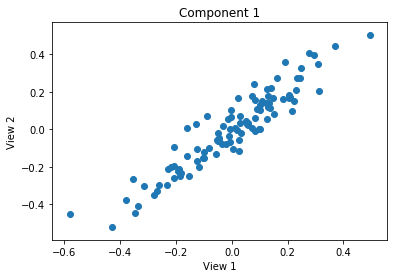

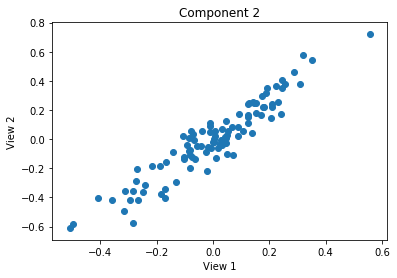

In [18]:
# kCCA should maximize the correlation between the components between the two views
# To confirm that kCCA works, we plot the same components of each of the views
# The embeddings should be linear for the first couple of components
fig = plt.figure()
plt.scatter(train_ccomponents[0][:,0],train_ccomponents[1][:,0])
plt.title('Component 1')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(train_ccomponents[0][:,1],train_ccomponents[1][:,1])
plt.title('Component 2')
plt.xlabel('View 1')
plt.ylabel('View 2')

In [6]:
print('''The canonical correlations are:\n
Dimension 1: %.04f\n
Dimension 2: %.04f\n
Dimension 3: %.04f\n
Dimension 4: %.04f
'''% tuple(kcca_training.cancorrs_))


The canonical correlations are:

Dimension 1: 0.9387

Dimension 2: 0.9441

Dimension 3: 0.1830

Dimension 4: -0.0364



Two canonical components capture correlational relationships between the datasets, as the first two canonical correlations are both above 0.90. The third and the fourth canonical components do not capture meaningful relationships between the datasets. The third and the fourth canonical correlations are very low (and even negative).

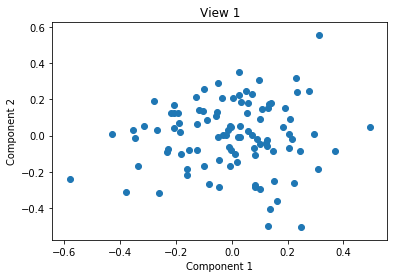

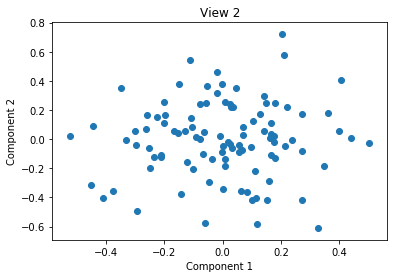

In [7]:
# To further confirm that linear kcca worked properly we plot 
# the first two canonical components for each view.
# The two plots should be similar as the components across both views are maximally corrolated

fig = plt.figure()
plt.scatter(train_ccomponents[0][:,0],train_ccomponents[0][:,1])
plt.title('View 1')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

fig = plt.figure()
plt.scatter(train_ccomponents[1][:,0],train_ccomponents[1][:,1])
plt.title('View 2')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

We have shown that the linear kcca mapping we generated with the training datasets maximizes the correlations between the canonical components. We now want to apply the linear kcca mapping to the testing dataset to see how well the mapping generalizes to the rest of the data

In [8]:
# Use the transform method to apply the kCCA mapping to the testing data
kcca_testing = kcca_l.transform([test1, test2])

# Get attributes from the kCCA mapping on testing data
test_weights = kcca_testing.weights_
test_ccomponents = kcca_testing.components_
test_ccorrelations = kcca_testing.cancorrs_

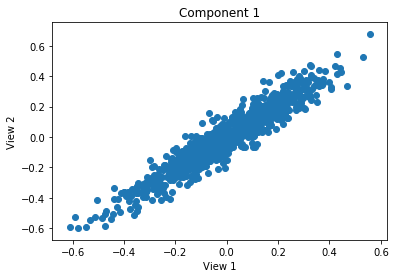

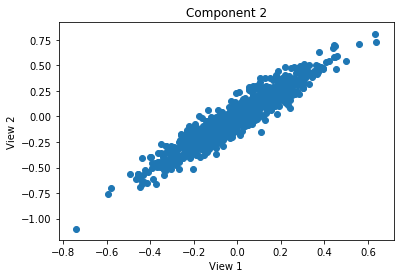

In [19]:
# We plot the same components across each view to see if the linear kcca mapping generalizes to the training data
# Again, the plots should show a linear correlation

fig = plt.figure()
plt.scatter(test_ccomponents[0][:,0],test_ccomponents[1][:,0])
plt.title('Component 1')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(test_ccomponents[0][:,1],test_ccomponents[1][:,1])
plt.title('Component 2')
plt.xlabel('View 1')
plt.ylabel('View 2')


In [10]:
print('''The canonical correlations for the test data are:\n
Dimension 1: %.04f\n
Dimension 2: %.04f\n
Dimension 3: %.04f\n
Dimension 4: %.04f
'''% tuple(test_ccorrelations))

print('''The canonical correlations are high for the first two dimensions and are only slightly smaller than the testing data''')

The canonical correlations for the test data are:

Dimension 1: 0.9478

Dimension 2: 0.9445

Dimension 3: 0.1792

Dimension 4: 0.1497

The canonical correlations are high for the first two dimensions and are only slightly smaller than the testing data


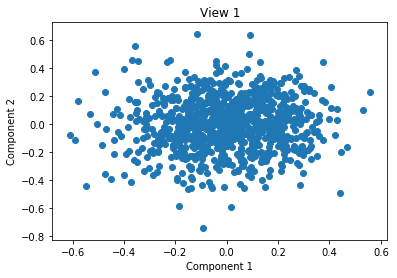

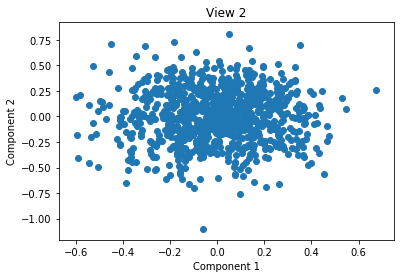

In [20]:
fig = plt.figure()
plt.scatter(test_ccomponents[0][:,0],test_ccomponents[0][:,1])
plt.title('View 1')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

fig = plt.figure()
plt.scatter(test_ccomponents[1][:,0],test_ccomponents[1][:,1])
plt.title('View 2')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Conclusion

Because the canonical mapping for the training data generalized to the testing data we can verify that linear kcca discovered the relationship between the two views of the data. 

We further can confirm this determining the prediction accuracy of the linear kcca mapping. We do this by comparing the correlation between the dimensions of the test data canonical projections and the original test data. We take the inverse of the weights to derive the original data from the canonical projection.

In [11]:
# Computes the accuracy of the mapping by comparing the canonical components to the original data
accuracy = kcca_testing.validate([test1, test2])

In [12]:
print('''The prediction accuracy for the first dataset is:\n
Dimension 1: %.02f\n
Dimension 2: %.02f\n
Dimension 3: %.02f\n
Dimension 4: %.02f\n
'''% tuple(accuracy[0]))
print('''The prediction accuracy for the second dataset is:\n
Dimension 1: %.02f\n
Dimension 2: %.02f\n
Dimension 3: %.02f\n
Dimension 4: %.02f\n
Dimension 5: %.02f
'''% tuple(accuracy[1]))

The prediction accuracy for the first dataset is:

Dimension 1: 0.91

Dimension 2: 0.85

Dimension 3: 0.91

Dimension 4: 0.85


The prediction accuracy for the second dataset is:

Dimension 1: 0.90

Dimension 2: 0.92

Dimension 3: 0.91

Dimension 4: 0.90

Dimension 5: 0.89



Linear kcca works because we were able to derive the linear relationship between the two views. This is shown by using the canonical weights derived from the training data on the testing data. We see that the accuracy of the model on the training data is at least 86% for each of the dimensions, which proves that linear kcca works.

# Comparison to GCCA

In [13]:
gcca = GCCA()
gcca_training = gcca.fit_transform([train1, train2], n_components=4)

gcca_test = gcca.transform([test1, test2])

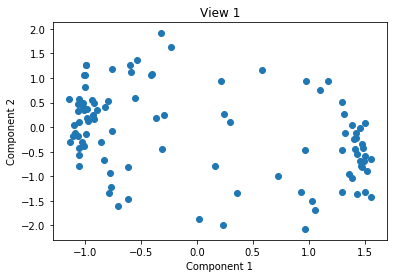

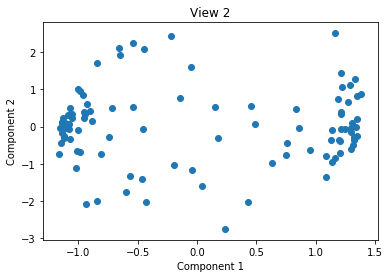

In [21]:
# Plotting first two training canonical components of each view
fig = plt.figure()
plt.scatter(gcca_training[0][:,0],gcca_training[0][:,1])
plt.title('View 1')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

fig = plt.figure()
plt.scatter(gcca_training[1][:,0],gcca_training[1][:,1])
plt.title('View 2')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

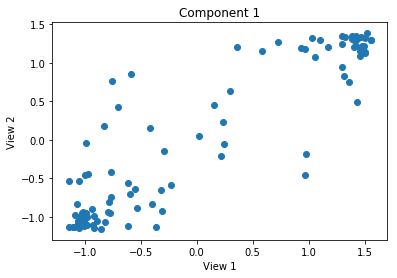

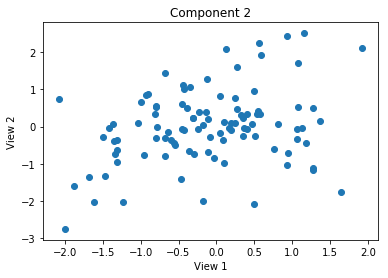

In [22]:
# Plotting training canonical components of each view. 
fig = plt.figure()
plt.scatter(gcca_training[0][:,0],gcca_training[1][:,0])
plt.title('Component 1')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(gcca_training[0][:,1],gcca_training[1][:,1])
plt.title('Component 2')
plt.xlabel('View 1')
plt.ylabel('View 2')

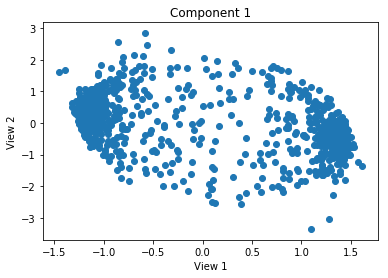

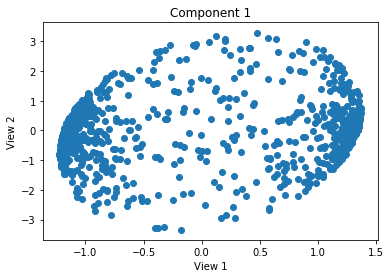

In [16]:
# Plotting the test gcca views into the same latent space
# We observe that the embedding does not look that similar across both views
fig = plt.figure()
plt.scatter(gcca_test[0][:,0],gcca_test[0][:,1])
plt.title('Component 1')
plt.xlabel('View 1')
plt.ylabel('View 2')

fig = plt.figure()
plt.scatter(gcca_test[1][:,0],gcca_test[1][:,1])
plt.title('Component 1')
plt.xlabel('View 1')
plt.ylabel('View 2')

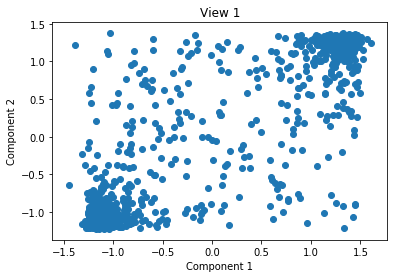

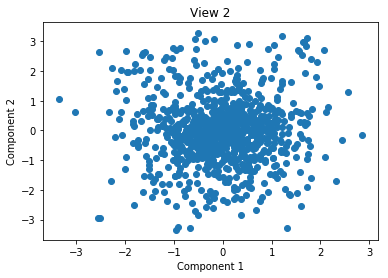

In [17]:
# Plotting testing canonical components of each view.
# We see that the plots do not resemble a line (as cca should maximizes this correlation).
fig = plt.figure()
plt.scatter(gcca_test[0][:,0],gcca_test[1][:,0])
plt.title('View 1')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

fig = plt.figure()
plt.scatter(gcca_test[0][:,1],gcca_test[1][:,1])
plt.title('View 2')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

We conclude that linear kCCA outperforms gcca in this example. We are able to see that gcca doesn't develop an accurate model that explains the linear relationships between the two views. This is due to the implementation of gcca which relies on using SVMs and is better suited for higher dimensional datasets. Linear kCCA is better suited to handle cases where lower dimensional datasets are used.